In [1]:
import pandas as pd
import numpy as np
import funciones_2 as fn2
import matplotlib.pyplot as plt
import pandas as pd

series = pd.read_csv('airline-passengers.csv')

series['Month'] = pd.to_datetime(series['Month'])

series.set_index('Month', inplace=True)

ts = series['Passengers']
print(ts.head())


c:\Users\nicol\anaconda3\envs\AST\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: Passengers, dtype: int64


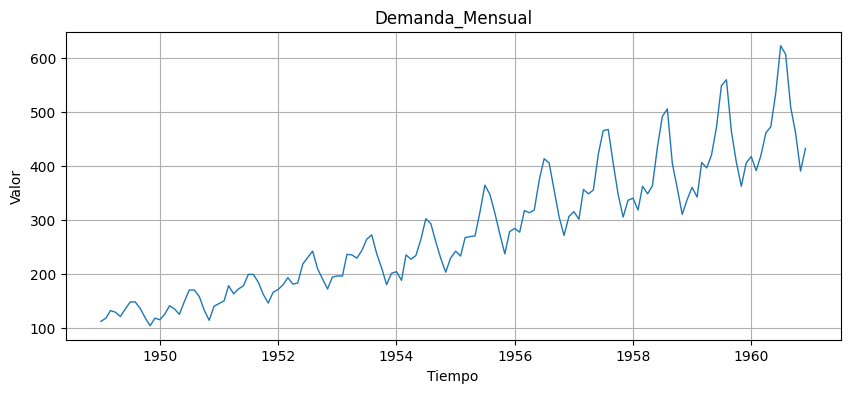

Figura guardada en: c:\Users\nicol\OneDrive\Escritorio\Tarea_2\problema_2_forecasting\figuras\time_series_Demanda_Mensual.png
---- ADF ----
ADF Statistic: 0.8153688792060482
p-value: 0.991880243437641
lags used: 13
n_obs: 130
critical values: {'1%': np.float64(-3.4816817173418295), '5%': np.float64(-2.8840418343195267), '10%': np.float64(-2.578770059171598)}


In [2]:
resultado = fn2.exploratory_analysis(ts, nombre="Demanda_Mensual")

print("Figura guardada en:", resultado["figura_guardada"])
print("---- ADF ----")
for k, v in resultado["adf"].items():
    print(f"{k}: {v}")


In [3]:
# Cargar serie
series = pd.read_csv('airline-passengers.csv', index_col=0, parse_dates=True)
ts = series['Passengers']

# ARIMA
res_arima = fn2.train_arima(ts, order=(2,1,2))
print("ARIMA metrics:", res_arima["metrics"])
print("Figura guardada en:", res_arima["figure"])

# SARIMA
res_sarima = fn2.train_sarima(ts, order=(2,1,2), seasonal_order=(1,1,1,12))
print("SARIMA metrics:", res_sarima["metrics"])
print("Figura guardada en:", res_sarima["figure"])

# Holt-Winters
res_hw = fn2.train_holtwinters(ts, seasonal_periods=12)
print("Holt-Winters metrics:", res_hw["metrics"])
print("Figura guardada en:", res_hw["figure"])

# Random Forest
res_rf = fn2.train_random_forest(ts, n_lags=12)
print("Random Forest metrics:", res_rf["metrics"])
print("Figura guardada en:", res_rf["figure"])



c:\Users\nicol\anaconda3\envs\AST\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\nicol\anaconda3\envs\AST\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\nicol\anaconda3\envs\AST\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\nicol\anaconda3\envs\AST\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA metrics: {'RMSE': np.float64(27.64308068268451), 'MAE': 20.847346757199453, 'MAPE': np.float64(7.781850901216901)}
Figura guardada en: c:\Users\nicol\OneDrive\Escritorio\Tarea_2\problema_2_forecasting\figuras\forecast_ARIMA_(2,_1,_2).png


c:\Users\nicol\anaconda3\envs\AST\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\nicol\anaconda3\envs\AST\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA metrics: {'RMSE': np.float64(15.758538395458254), 'MAE': 10.369813316750285, 'MAPE': np.float64(4.928119697679749)}
Figura guardada en: c:\Users\nicol\OneDrive\Escritorio\Tarea_2\problema_2_forecasting\figuras\forecast_SARIMA_(2,_1,_2)_(1,_1,_1,_12).png


c:\Users\nicol\anaconda3\envs\AST\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Holt-Winters metrics: {'RMSE': np.float64(12.237332890497083), 'MAE': 9.408221635447667, 'MAPE': np.float64(3.5337667667365467)}
Figura guardada en: c:\Users\nicol\OneDrive\Escritorio\Tarea_2\problema_2_forecasting\figuras\forecast_HoltWinters.png
Random Forest metrics: {'RMSE': np.float64(31.902091972505858), 'MAE': 20.64777777777778, 'MAPE': np.float64(6.192252620158483)}
Figura guardada en: c:\Users\nicol\OneDrive\Escritorio\Tarea_2\problema_2_forecasting\figuras\forecast_RandomForest_12lags.png


In [4]:
import pandas as pd

df_metrics = pd.DataFrame({
    "ARIMA": res_arima["metrics"],
    "SARIMA": res_sarima["metrics"],
    "HoltWinters": res_hw["metrics"],
    "RandomForest": res_rf["metrics"]
}).T

print(df_metrics)


                   RMSE        MAE      MAPE
ARIMA         27.643081  20.847347  7.781851
SARIMA        15.758538  10.369813  4.928120
HoltWinters   12.237333   9.408222  3.533767
RandomForest  31.902092  20.647778  6.192253


In [5]:
orders = [(1,1,1), (2,1,2), (0,1,1)]
arima_results = fn2.train_multiple_arima(ts, orders)
summary_df = fn2.summarize_arima(arima_results)
summary_df

c:\Users\nicol\anaconda3\envs\AST\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\nicol\anaconda3\envs\AST\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\nicol\anaconda3\envs\AST\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\nicol\anaconda3\envs\AST\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\nicol\anaconda3\envs\AST\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provid

,order,AIC,BIC,loglikelihood,RMSE,MAE,MAPE
0,"(1, 1, 1)",1394.682505,1403.571039,-694.341253,32.294434,24.914622,9.272350
1,"(2, 1, 2)",1353.346641,1368.160864,-671.673320,27.643081,20.847347,7.781851
2,"(0, 1, 1)",1397.257575,1403.183264,-696.628787,32.809292,25.332611,9.381777


c:\Users\nicol\anaconda3\envs\AST\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\nicol\anaconda3\envs\AST\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\nicol\anaconda3\envs\AST\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\nicol\anaconda3\envs\AST\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\nicol\anaconda3\envs\AST\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provid

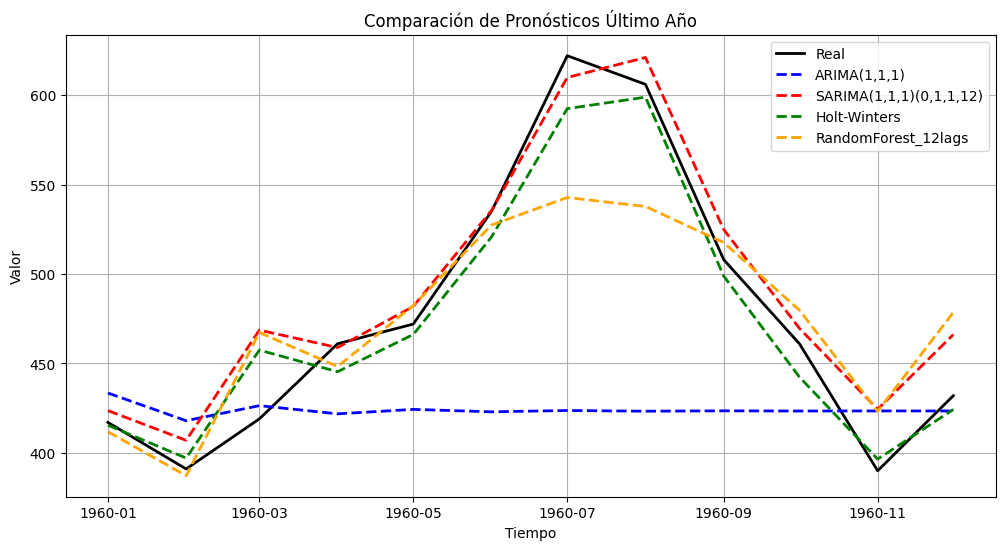

Figura guardada en: c:\Users\nicol\OneDrive\Escritorio\Tarea_2\problema_2_forecasting\figuras\comparative_forecasts_last_year.png


In [6]:
# Suponiendo que ya tienes:
metrics_df, results, train, test = fn2.evaluate_models_last_year(ts)

# Graficar comparación
fig_path = fn2.plot_comparative_forecasts_last_year(ts, results, train, test)
print("Figura guardada en:", fig_path)


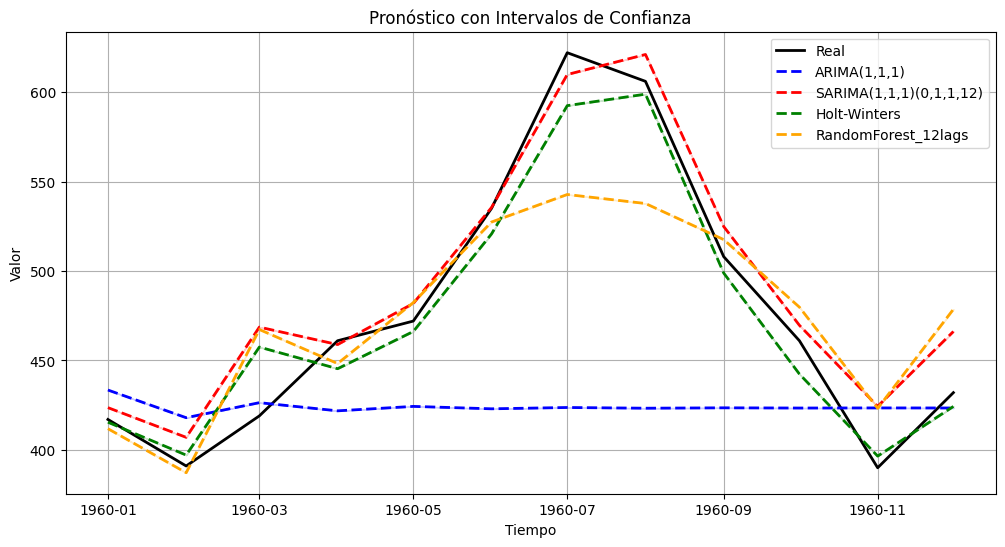

Figura guardada en: c:\Users\nicol\OneDrive\Escritorio\Tarea_2\problema_2_forecasting\figuras\forecast_with_confidence.png


In [7]:
fig_path = fn2.plot_forecast_with_confidence(ts, results, train, test)
print("Figura guardada en:", fig_path)


c:\Users\nicol\anaconda3\envs\AST\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\nicol\anaconda3\envs\AST\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\nicol\anaconda3\envs\AST\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


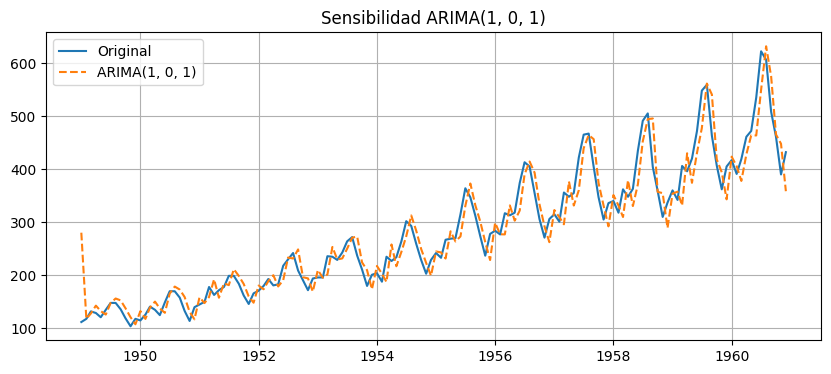

c:\Users\nicol\anaconda3\envs\AST\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\nicol\anaconda3\envs\AST\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\nicol\anaconda3\envs\AST\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


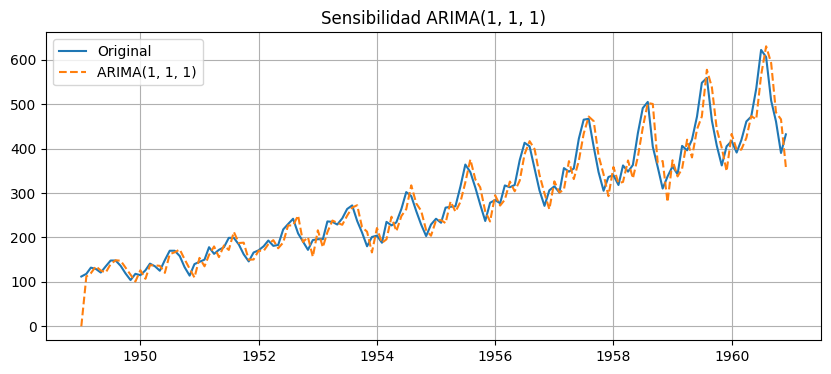

c:\Users\nicol\anaconda3\envs\AST\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\nicol\anaconda3\envs\AST\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\nicol\anaconda3\envs\AST\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


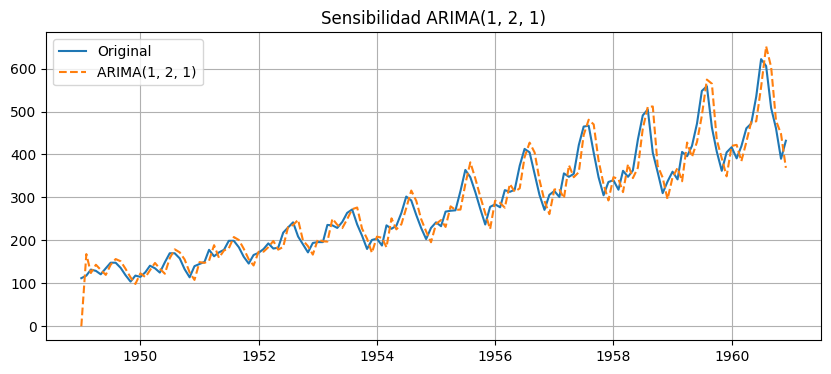

,order,RMSE,MAE,MAPE,AIC,BIC
0,"(1, 0, 1)",33.958695,25.336901,9.694303,1409.748723,1421.627976
1,"(1, 1, 1)",32.294434,24.914622,9.272350,1394.682505,1403.571039
2,"(1, 2, 1)",33.723545,26.115346,9.817338,1398.928398,1407.795879


In [8]:
orders_to_test = [(1,0,1), (1,1,1), (1,2,1)]
df_sens_arima = fn2.sensitivity_arima(ts, orders_to_test)
df_sens_arima


c:\Users\nicol\anaconda3\envs\AST\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


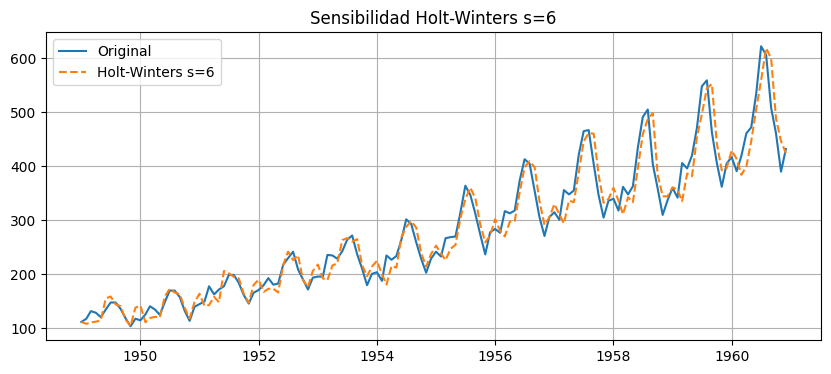

c:\Users\nicol\anaconda3\envs\AST\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


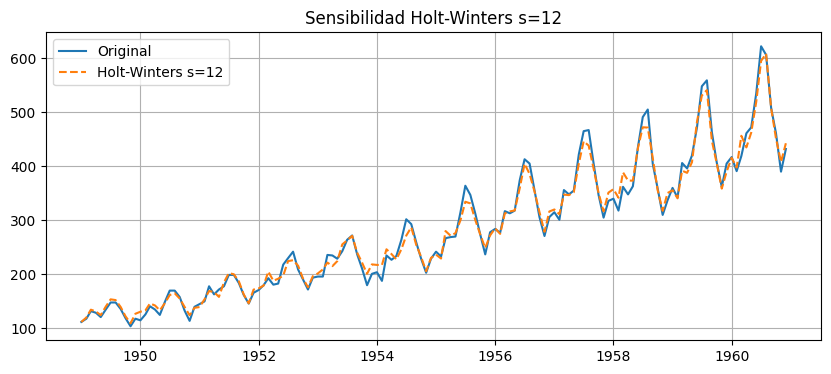

c:\Users\nicol\anaconda3\envs\AST\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


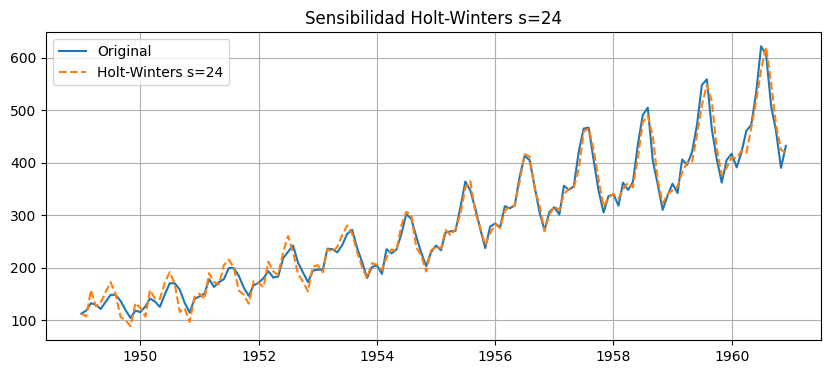

,seasonal_periods,RMSE,MAE,MAPE
0,6,27.024025,20.130720,7.207121
1,12,12.237333,9.408222,3.533767
2,24,16.470274,12.725301,5.309157


In [9]:
seasonal_list = [6, 12, 24]
df_sens_hw = fn2.sensitivity_holtwinters(ts, seasonal_list)
df_sens_hw
